In [1]:
# Import libraries
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Widen jupyter notebook cells
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Show all columns in the head command
pd.set_option('display.max_columns', None)

In [3]:
# Load data from the csv file into a DataFrame and save in a variable
df = pd.read_csv("titles.csv")

In [4]:
df.head(len(df))

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
1,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
2,tm19424,Detour,MOVIE,"The life of Al Roberts, a pianist in a New Yor...",1945,NaN,66,"['thriller', 'drama', 'crime']",['US'],NaN,tt0037638,7.3,17233.0,7.757,7.2
3,tm112005,Marihuana,MOVIE,A young girl named Burma attends a beach party...,1936,NaN,57,"['crime', 'drama']",['US'],NaN,tt0026683,4.0,864.0,3.748,3.6
4,tm22806,Intolerance: Love's Struggle Throughout the Ages,MOVIE,"The story of a poor young woman, separated by ...",1916,NaN,197,"['history', 'drama']",['US'],NaN,tt0006864,7.7,15242.0,9.412,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2820,ts305329,House Calls with Dr. Phil,SHOW,The talk show legend travels across the countr...,2021,TV-14,43,['reality'],['US'],1.0,tt15176234,5.4,35.0,0.600,NaN
2821,ts291097,Disrupt & Dismantle with Soledad O'Brien,SHOW,NaN,2021,TV-MA,40,['documentation'],[],1.0,tt14315936,3.5,18.0,NaN,NaN
2822,tm1100359,Race Against Time: The CIA and 9/11,MOVIE,Follows former top officials and elite operati...,2021,NaN,89,['documentation'],[],NaN,tt15392066,4.6,64.0,2.403,NaN
2823,tm1097570,Virus Hunting: Cave to COVID,MOVIE,"As the world battles COVID-19, a team of exper...",2021,NaN,60,[],[],NaN,NaN,NaN,NaN,0.600,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2825 entries, 0 to 2824
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2825 non-null   object 
 1   title                 2825 non-null   object 
 2   type                  2825 non-null   object 
 3   description           2812 non-null   object 
 4   release_year          2825 non-null   int64  
 5   age_certification     1302 non-null   object 
 6   runtime               2825 non-null   int64  
 7   genres                2825 non-null   object 
 8   production_countries  2825 non-null   object 
 9   seasons               626 non-null    float64
 10  imdb_id               2666 non-null   object 
 11  imdb_score            2613 non-null   float64
 12  imdb_votes            2613 non-null   float64
 13  tmdb_popularity       2768 non-null   float64
 14  tmdb_score            2337 non-null   float64
dtypes: float64(5), int64(

In [ ]:
# description has 13 missing values
# age_certification has 1523 missing values
# seasons has 2199 missing values
# imdb_id has 159 missing values
# imdb_score has 212 missing values
# imdb_votes has 212 missing values
# tmdb_popularity has 57 missing values
# tmdb_score has 488 missing values

In [6]:
# Dealing with missing data
df.isnull().any()

id                      False
title                   False
type                    False
description              True
release_year            False
age_certification        True
runtime                 False
genres                  False
production_countries    False
seasons                  True
imdb_id                  True
imdb_score               True
imdb_votes               True
tmdb_popularity          True
tmdb_score               True
dtype: bool

In [8]:
# Create a new df of just the rows that are missing data
df_null_geo = df[pd.isnull(df.description)]
df_null_geo.head(len(df))

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
468,tm770645,Great Snakes,MOVIE,NaN,1920,NaN,60,['comedy'],['GB'],NaN,tt0203539,6.5,40.0,NaN,NaN
1236,ts39373,The New Adventures Of Madeline,SHOW,NaN,1993,NaN,24,[],[],3.0,NaN,NaN,NaN,0.997,8.3
1479,ts291963,Frankie and Frank,SHOW,NaN,2008,TV-Y,1,['family'],[],1.0,tt14392744,NaN,NaN,NaN,NaN
1496,tm640565,Hover Racers: Flying on Air,MOVIE,NaN,2007,NaN,46,['documentation'],['US'],NaN,tt1702368,NaN,NaN,NaN,NaN
1793,tm371916,Elephant King,MOVIE,NaN,2013,NaN,46,['documentation'],[],NaN,NaN,NaN,NaN,0.600,NaN
1879,ts224405,Drunk History México,SHOW,NaN,2016,NaN,25,['comedy'],['MX'],3.0,NaN,NaN,NaN,1.819,NaN
2095,ts97912,The Halo Effect,SHOW,NaN,2016,NaN,21,"['documentation', 'comedy']",['US'],1.0,tt7105502,NaN,NaN,NaN,NaN
2301,ts59962,Red & Blue,SHOW,NaN,2018,NaN,33,[],['US'],1.0,tt17492254,NaN,NaN,0.600,NaN
2340,ts80881,Survival in the Skies,SHOW,NaN,2017,TV-PG,46,['documentation'],['US'],1.0,tt6588988,NaN,NaN,0.600,NaN
2448,ts326817,China's Dragon Emperor,SHOW,NaN,2018,TV-PG,44,['drama'],['KR'],1.0,NaN,NaN,NaN,0.601,NaN


In [ ]:
# Release year

Text(0, 0.5, '')

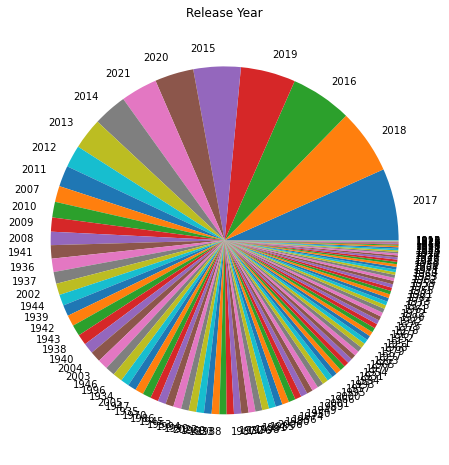

In [12]:
plt.figure(figsize=(12,8));

services = df['release_year'].value_counts()
services.plot(kind='pie')

plt.title('Release Year')
plt.ylabel("")

array([[<AxesSubplot:title={'center':'release_year'}>]], dtype=object)

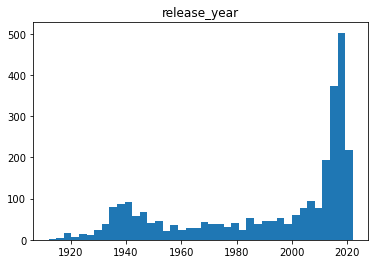

In [11]:
df.hist(['release_year'], bins=40, grid=False)